In [27]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
file_path = '../../../data/full_tesla_df.com.csv'
df = pd.read_csv(file_path)

# 1 Eliminar la columna 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

# 2 Quitar '€', puntos y convertir a float
df['price'] = df['price'].str.replace('€', '').str.replace('.', '').str.replace(',', '.').str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# 3 Limpiar la columna de kilometros
df['km'] = df['km'].str.extract(r'(\d[\d.,]*)')[0].str.replace('.', '').str.replace(',', '.')
df['km'] = pd.to_numeric(df['km'], errors='coerce').fillna(0).astype(int)

# 4 Cambiar comas por puntos y convertir a float
df['zero_hundred'] = df['zero_hundred'].str.replace(',', '.')
df['zero_hundred'] = pd.to_numeric(df['zero_hundred'], errors='coerce')

# 5 Manejo de valores nulos
df.dropna(subset=['traction', 'price', 'range', 'max_vel', 'zero_hundred'], inplace=True)

print(df)

     sell_type car_type  year  color country  \
0        Nuevo  Model S  2024  WHITE   spain   
1        Nuevo  Model S  2024  WHITE   spain   
2        Nuevo  Model S  2024  WHITE   spain   
3        Nuevo  Model S  2024  BLACK   spain   
4        Nuevo  Model S  2024  BLACK   spain   
...        ...      ...   ...    ...     ...   
2058   Ocasion  Model Y  2022  WHITE   italy   
2059   Ocasion  Model Y  2023  BLACK   italy   
2060   Ocasion  Model Y  2022  BLACK   italy   
2061   Ocasion  Model Y  2022   GREY   italy   
2062   Ocasion  Model Y  2023   GREY   italy   

                                   traction     price     km  range  max_vel  \
0     Model S, tracción a las cuatro ruedas   99600.0    503  634.0    250.0   
1     Model S, tracción a las cuatro ruedas  102270.0     99  634.0    250.0   
2     Model S, tracción a las cuatro ruedas  102270.0      0  634.0    250.0   
3     Model S, tracción a las cuatro ruedas   90340.0    577  634.0    250.0   
4                      

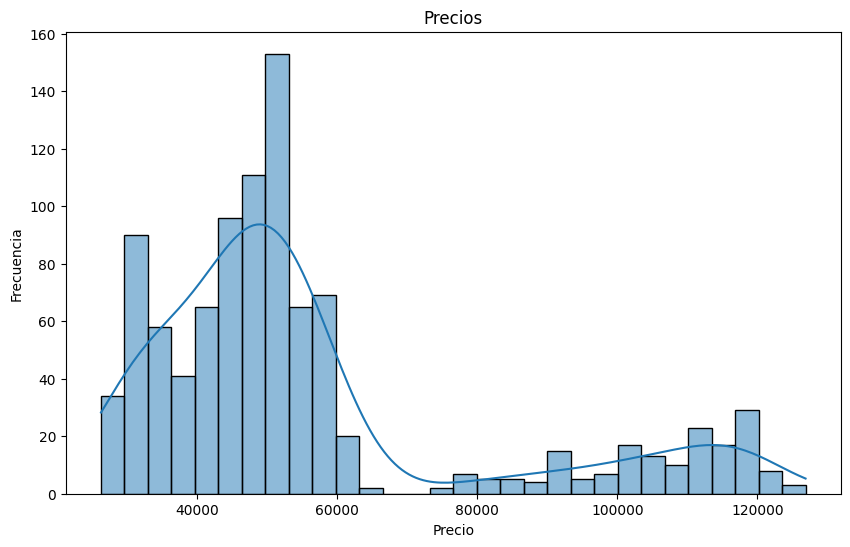

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

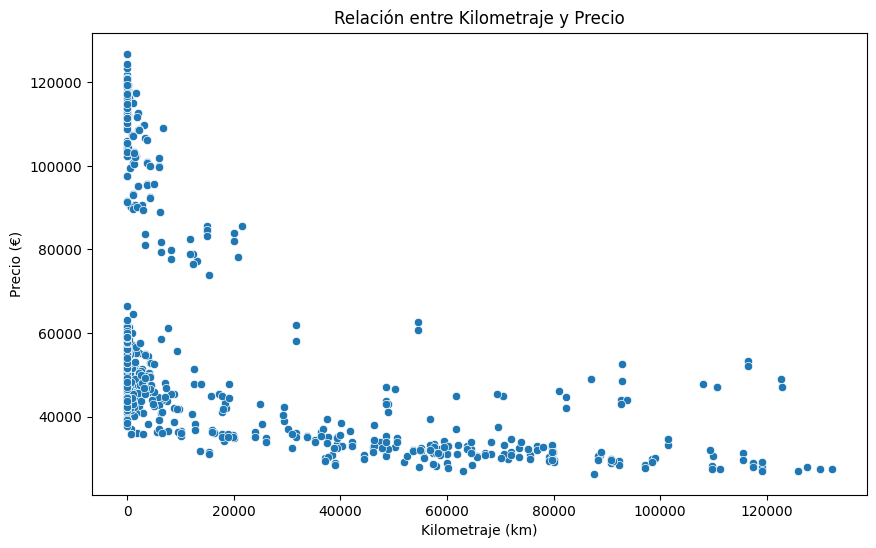

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df)
plt.title('Relación entre Kilometraje y Precio')
plt.xlabel('Kilometraje (km)')
plt.ylabel('Precio (€)')
plt.show()

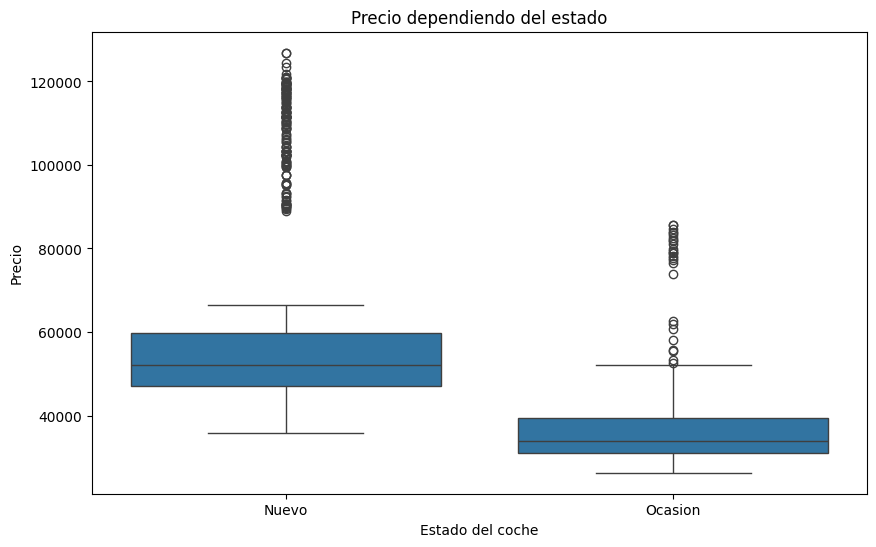

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sell_type', y='price', data=df)
plt.title('Precio dependiendo del estado')
plt.xlabel('Estado del coche')
plt.ylabel('Precio')
plt.show()

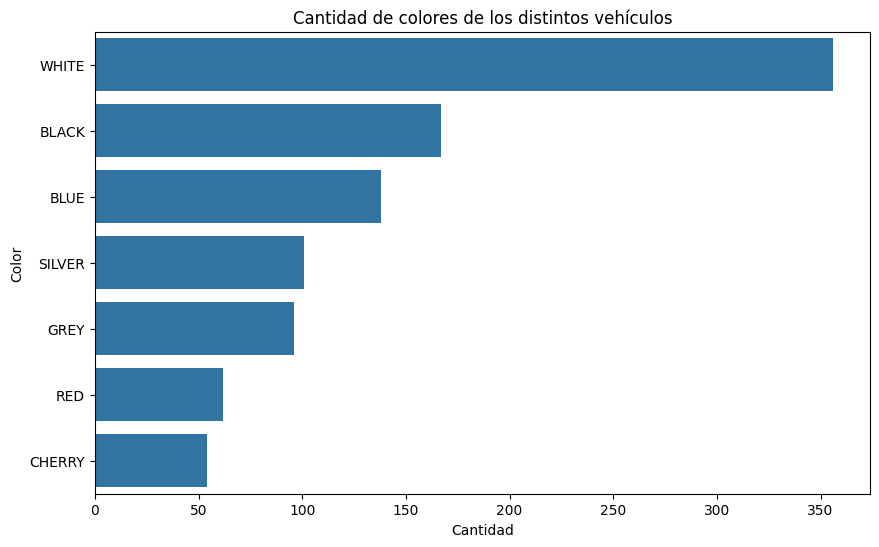

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(y='color', data=df, order=df['color'].value_counts().index)
plt.title('Cantidad de colores de los distintos vehículos')
plt.xlabel('Cantidad')
plt.ylabel('Color')
plt.show()

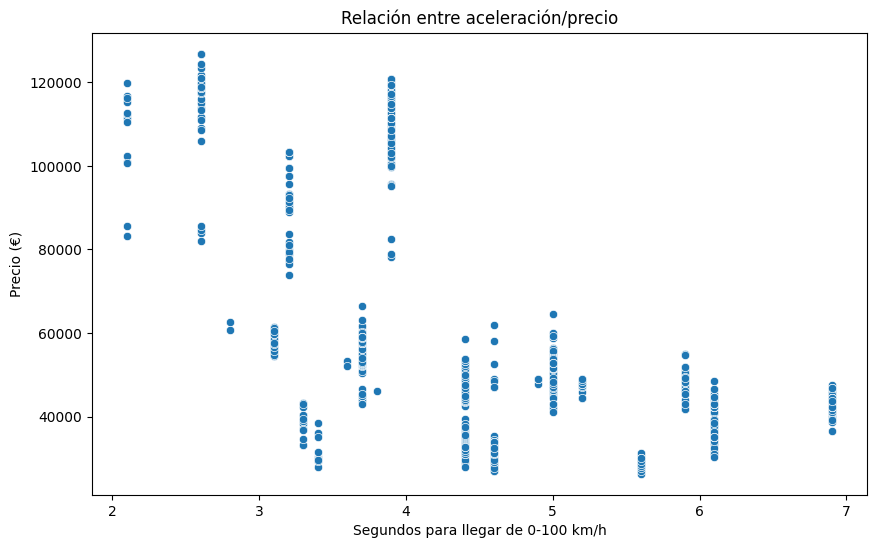

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zero_hundred', y='price', data=df)
plt.title('Relación entre aceleración/precio')
plt.xlabel('Segundos para llegar de 0-100 km/h')
plt.ylabel('Precio (€)')
plt.show()

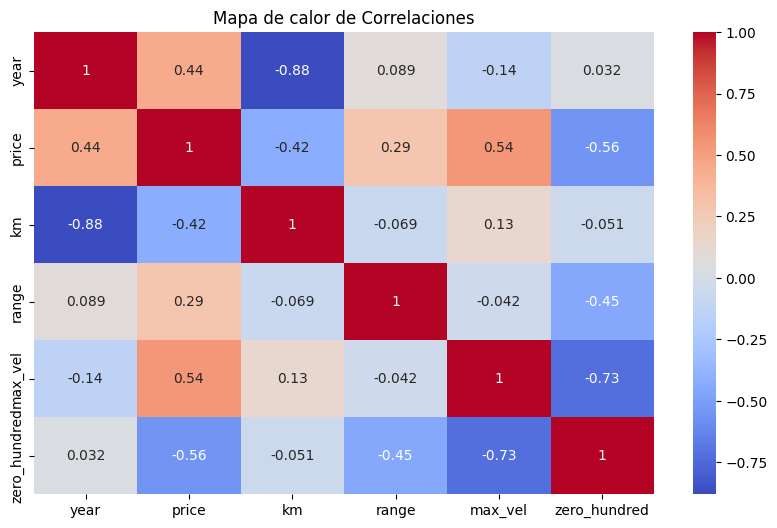

In [34]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de Correlaciones')
plt.show()